In [ ]:
!mkdir -p /content/datasets/brain-tumor


In [ ]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip" -o brain-tumor.zip
!unzip brain-tumor.zip -d /content/datasets/brain-tumor/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4149k  100 4149k    0     0  2487k      0  0:00:01  0:00:01 --:--:-- 42.2M
Archive:  brain-tumor.zip
  inflating: /content/datasets/brain-tumor/train/images/00054_145.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00054_164.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00056_110.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00056_129.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00056_147.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00056_239.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00056_92.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00058_102.jpg  
  inflating: /content/datasets/brain-tumor/train/images/00058_122.jpg  
  inflating

In [ ]:
!ls /content/datasets/brain-tumor
!ls /content/datasets/brain-tumor/images
!ls /content/datasets/brain-tumor/labels


train  valid
ls: cannot access '/content/datasets/brain-tumor/images': No such file or directory
ls: cannot access '/content/datasets/brain-tumor/labels': No such file or directory


In [ ]:
!ls /content/datasets/brain-tumor/train
!ls /content/datasets/brain-tumor/valid


images	labels
images	labels


In [ ]:
%%writefile /content/datasets/brain-tumor.yaml
path: /content/datasets/brain-tumor
train: train/images
val: valid/images
test: valid/images
names: ['negative', 'positive']


Writing /content/datasets/brain-tumor.yaml


In [ ]:
!ls /content/datasets/brain-tumor/train/images
!ls /content/datasets/brain-tumor/train/labels
!ls /content/datasets/brain-tumor/valid/images
!ls /content/datasets/brain-tumor/valid/labels


 00054_145.jpg	 00116_9.jpg	 00165_158.jpg	 00282_83.jpg	'112 (2).jpg'  '74 (6).jpg'
 00054_164.jpg	 00117_200.jpg	 00165_176.jpg	 00282_87.jpg	 112.jpg       '74 (7).jpg'
 00056_110.jpg	 00120_215.jpg	 00165_193.jpg	 00282_93.jpg	'113 (2).jpg'  '74 (8).jpg'
 00056_129.jpg	 00120_230.jpg	 00166_189.jpg	 00282_99.jpg	 113.jpg       '74 (9).jpg'
 00056_147.jpg	 00120_245.jpg	 00166_206.jpg	 00284_149.jpg	 114.jpg        74.jpg
 00056_239.jpg	 00120_260.jpg	 00166_224.jpg	 00285_87.jpg	 115.jpg       '75 (10).jpg'
 00056_92.jpg	 00121_139.jpg	 00166_241.jpg	 00285_93.jpg	 116.jpg       '75 (2).jpg'
 00058_102.jpg	 00121_157.jpg	 00166_259.jpg	 00291_22.jpg	 118.jpg       '75 (3).jpg'
 00058_122.jpg	 00121_175.jpg	 00167_125.jpg	 00291_23.jpg	 119.jpg       '75 (4).jpg'
 00058_141.jpg	 00122_108.jpg	 00167_127.jpg	 00291_24.jpg	 124.jpg       '75 (5).jpg'
 00058_179.jpg	 00122_10.jpg	 00167_213.jpg	 00294_20.jpg	 125.jpg       '75 (6).jpg'
 00059_103.jpg	 00122_11.jpg	 00169_112.jpg	 00294

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.2/825.2 kB 19.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="/content/datasets/brain-tumor.yaml", epochs=100, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 338MB/s]


Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/brain-tumor.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 92.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/brain-tumor/train/labels... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 1629.74it/s]

train: New cache created: /content/datasets/brain-tumor/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/brain-tumor/valid/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 787.27it/s]


val: New cache created: /content/datasets/brain-tumor/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G      1.416      3.408       1.25         20        640: 100%|██████████| 56/56 [00:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        223        241    0.00237      0.682       0.19      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.24G      1.202       2.35      1.132         29        640: 100%|██████████| 56/56 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        223        241      0.425      0.629      0.393      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.26G       1.25      2.034      1.168         21        640: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        223        241      0.413      0.547      0.381      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.24G      1.209      1.818      1.154         17        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        223        241       0.44      0.731      0.451      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.24G      1.179      1.608      1.132         16        640: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        223        241      0.465      0.741      0.478      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.24G      1.152      1.473      1.132         17        640: 100%|██████████| 56/56 [00:18<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        223        241       0.44      0.794       0.47       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.24G      1.205      1.443      1.132         21        640: 100%|██████████| 56/56 [00:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        223        241      0.424      0.681      0.426      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.24G      1.171      1.387       1.12         15        640: 100%|██████████| 56/56 [00:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        223        241      0.426      0.728      0.451      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G       1.14      1.336      1.101         25        640: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        223        241       0.47      0.785      0.496      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.24G        1.1      1.273      1.088         20        640: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        223        241      0.469      0.753       0.49      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.24G      1.093      1.273      1.082         24        640: 100%|██████████| 56/56 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        223        241      0.447      0.817      0.469      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.24G      1.062      1.239       1.08         14        640: 100%|██████████| 56/56 [00:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        223        241      0.468      0.821       0.49      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.24G      1.067      1.226      1.091         17        640: 100%|██████████| 56/56 [00:19<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        223        241      0.442      0.835      0.491      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.24G      1.096      1.232      1.091         26        640: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        223        241      0.424      0.815      0.448      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.24G      1.084      1.231      1.085         19        640: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        223        241      0.471      0.818      0.501      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.24G      1.031      1.237      1.077         19        640: 100%|██████████| 56/56 [00:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        223        241      0.468      0.771      0.489       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.24G      1.036      1.171      1.066         24        640: 100%|██████████| 56/56 [00:18<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        223        241      0.435      0.854      0.501      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.24G      1.032      1.153       1.06         25        640: 100%|██████████| 56/56 [00:18<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]

                   all        223        241      0.435      0.875      0.466      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.24G      1.052      1.171      1.064         23        640: 100%|██████████| 56/56 [00:19<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        223        241      0.445      0.808      0.464      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G      1.014      1.131      1.046         23        640: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        223        241      0.447      0.829      0.457      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.24G      1.008      1.134      1.042         20        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        223        241       0.44      0.879      0.462       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G      1.023      1.145      1.062         24        640: 100%|██████████| 56/56 [00:18<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        223        241       0.43      0.792      0.453      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.24G     0.9756      1.098      1.036         26        640: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        223        241      0.442      0.804      0.455      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.24G          1      1.104      1.046         17        640: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        223        241      0.425      0.855      0.462      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.24G     0.9768      1.067      1.029         18        640: 100%|██████████| 56/56 [00:18<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]

                   all        223        241       0.38      0.839      0.413      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.24G       0.97      1.091      1.024         22        640: 100%|██████████| 56/56 [00:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        223        241      0.449      0.854      0.472       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.24G     0.9653      1.075       1.03         19        640: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        223        241      0.425      0.879      0.433      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.24G     0.9979      1.055      1.042         17        640: 100%|██████████| 56/56 [00:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        223        241      0.417      0.876      0.445      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.24G     0.9853       1.03      1.026         19        640: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        223        241      0.421      0.888      0.454      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.24G     0.9535      1.064      1.023         22        640: 100%|██████████| 56/56 [00:18<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        223        241      0.418      0.877      0.422      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.24G     0.9736      1.042      1.019         12        640: 100%|██████████| 56/56 [00:18<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        223        241      0.439      0.894      0.461      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.24G     0.9415      1.029      1.011         21        640: 100%|██████████| 56/56 [00:18<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        223        241      0.409      0.857      0.433      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.24G     0.9497       1.01      1.021         17        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        223        241      0.442      0.914      0.468      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.24G     0.9581      1.006      1.018         27        640: 100%|██████████| 56/56 [00:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        223        241      0.435        0.8      0.459      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.24G     0.9187      0.978      1.012         18        640: 100%|██████████| 56/56 [00:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        223        241      0.433      0.876      0.478      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.24G     0.9418     0.9726      1.011         21        640: 100%|██████████| 56/56 [00:18<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        223        241      0.454      0.857      0.452      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.24G     0.9457     0.9819      1.027         18        640: 100%|██████████| 56/56 [00:18<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        223        241       0.45      0.845      0.448      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.24G     0.9205     0.9859      1.008         20        640: 100%|██████████| 56/56 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        223        241      0.421       0.89      0.429      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.25G      0.911     0.9476      1.002         22        640: 100%|██████████| 56/56 [00:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        223        241      0.393       0.88      0.413      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.24G     0.9115     0.9533     0.9991         21        640: 100%|██████████| 56/56 [00:18<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        223        241      0.435      0.858      0.436      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.24G      0.916     0.9345     0.9986         22        640: 100%|██████████| 56/56 [00:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        223        241      0.406      0.816      0.412      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.24G      0.924     0.9234     0.9984         20        640: 100%|██████████| 56/56 [00:18<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        223        241      0.406      0.835       0.41      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.24G     0.9355     0.9075      1.008         19        640: 100%|██████████| 56/56 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        223        241      0.406      0.887      0.434      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.24G     0.9115     0.9188      1.001         14        640: 100%|██████████| 56/56 [00:19<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        223        241      0.423      0.814      0.439      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.24G     0.8898     0.8895     0.9994         23        640: 100%|██████████| 56/56 [00:19<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        223        241      0.434      0.853      0.457      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.24G     0.8815     0.8912      0.995         20        640: 100%|██████████| 56/56 [00:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        223        241      0.402      0.814      0.437      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.24G     0.8779     0.8714     0.9957         22        640: 100%|██████████| 56/56 [00:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        223        241      0.411      0.854      0.415      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.24G     0.8929     0.8508     0.9865         25        640: 100%|██████████| 56/56 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        223        241      0.439      0.809       0.45       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.24G     0.9137     0.8794      1.007         18        640: 100%|██████████| 56/56 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        223        241      0.416      0.808      0.418      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.24G     0.8794     0.8343      0.964         21        640: 100%|██████████| 56/56 [00:18<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        223        241      0.419      0.833       0.44      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.24G     0.8525     0.8136     0.9805         19        640: 100%|██████████| 56/56 [00:19<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        223        241      0.418      0.848      0.446      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.24G     0.8901     0.8107     0.9858         24        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        223        241      0.402      0.838      0.429        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.24G     0.9027     0.8322     0.9869         26        640: 100%|██████████| 56/56 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        223        241      0.357      0.784      0.389      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.24G      0.859     0.8238     0.9773         33        640: 100%|██████████| 56/56 [00:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        223        241      0.418       0.81      0.434      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G     0.8738     0.7929     0.9848         16        640: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        223        241      0.375      0.774      0.406      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.24G      0.849     0.7883     0.9753         26        640: 100%|██████████| 56/56 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        223        241      0.408      0.802       0.44      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.24G     0.8521     0.7692     0.9718         19        640: 100%|██████████| 56/56 [00:19<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        223        241      0.402      0.845      0.474      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.24G     0.8506     0.7636     0.9626         28        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        223        241      0.439      0.831      0.468      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.24G     0.8282     0.7745     0.9682         19        640: 100%|██████████| 56/56 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        223        241      0.391      0.711      0.459       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.24G     0.8431     0.7649      0.979         19        640: 100%|██████████| 56/56 [00:18<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        223        241      0.362      0.757      0.434      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.24G     0.8195     0.7555     0.9679         23        640: 100%|██████████| 56/56 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        223        241      0.416        0.8      0.467      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.24G     0.8242      0.743     0.9694         16        640: 100%|██████████| 56/56 [00:18<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        223        241      0.422      0.849      0.469      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.24G     0.8401     0.7169     0.9724         24        640: 100%|██████████| 56/56 [00:18<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        223        241      0.391      0.811      0.459      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.24G     0.8167     0.7168     0.9647         17        640: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        223        241      0.397      0.826      0.473      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.24G     0.7995     0.6875      0.954         18        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        223        241      0.431      0.789      0.509      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.24G     0.8027     0.7011     0.9621         23        640: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        223        241       0.39      0.821      0.466      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.24G     0.8203     0.6765     0.9699         20        640: 100%|██████████| 56/56 [00:18<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        223        241      0.454       0.74       0.51      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.24G     0.8028     0.6802      0.957         21        640: 100%|██████████| 56/56 [00:18<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        223        241      0.441      0.754      0.509      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.24G     0.8028     0.6717     0.9443         12        640: 100%|██████████| 56/56 [00:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        223        241      0.373      0.699      0.434       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.24G     0.8121     0.7015     0.9543         18        640: 100%|██████████| 56/56 [00:18<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        223        241      0.411      0.721      0.484      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.24G     0.7777     0.6377      0.942         27        640: 100%|██████████| 56/56 [00:18<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        223        241      0.392      0.757      0.461      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.24G     0.7868     0.6313     0.9468         19        640: 100%|██████████| 56/56 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        223        241      0.425      0.779        0.5      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.24G     0.8007     0.6422     0.9577         25        640: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        223        241      0.466      0.777       0.53      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.24G     0.8067     0.6346     0.9646         17        640: 100%|██████████| 56/56 [00:18<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        223        241      0.412      0.765      0.491      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.24G     0.7733     0.6099     0.9398         24        640: 100%|██████████| 56/56 [00:18<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        223        241      0.435      0.819      0.482       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.24G     0.7465     0.6154     0.9338         15        640: 100%|██████████| 56/56 [00:18<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        223        241       0.43      0.781      0.487      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.24G     0.7767       0.59     0.9438         25        640: 100%|██████████| 56/56 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        223        241      0.422      0.753      0.462      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.24G     0.7599     0.5975     0.9366         22        640: 100%|██████████| 56/56 [00:18<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        223        241      0.407      0.731       0.47      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.24G     0.7778     0.5885     0.9489         17        640: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        223        241      0.474      0.671      0.506      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.24G     0.7629     0.5974     0.9413         21        640: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        223        241      0.416      0.735      0.457      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.24G     0.7742     0.6052     0.9487         19        640: 100%|██████████| 56/56 [00:19<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all        223        241      0.434      0.776      0.511      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.24G     0.7364      0.548     0.9216         22        640: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        223        241      0.474      0.609       0.49      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G      0.743     0.5462     0.9314         21        640: 100%|██████████| 56/56 [00:18<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        223        241      0.443      0.751      0.535      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.24G     0.7678      0.563     0.9369         30        640: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        223        241      0.426      0.774      0.499      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.24G     0.7423     0.5677     0.9315         22        640: 100%|██████████| 56/56 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        223        241      0.453      0.783      0.524      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.24G     0.7432     0.5377     0.9407         29        640: 100%|██████████| 56/56 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        223        241      0.453      0.772      0.536      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.24G     0.7401     0.5649     0.9401         21        640: 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        223        241       0.46      0.718      0.525      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.24G     0.7394     0.5285     0.9312         20        640: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]

                   all        223        241       0.45      0.735      0.533      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.24G     0.7213     0.5201     0.9258         14        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        223        241      0.445      0.764      0.523      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G     0.7234     0.5462     0.9302         16        640: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        223        241      0.444      0.744      0.537      0.399


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.24G     0.6792      0.468      0.892         13        640: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all        223        241      0.431      0.767      0.537      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.24G     0.6633     0.4467     0.8977         16        640: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.425      0.752      0.504      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G     0.6386     0.4143     0.8902         14        640: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]

                   all        223        241      0.435      0.735      0.523      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.24G     0.6377     0.4079     0.8856         12        640: 100%|██████████| 56/56 [00:18<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        223        241      0.427      0.749      0.529      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.24G     0.6318     0.3952     0.8862         13        640: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        223        241      0.442      0.775      0.552      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.24G      0.622     0.3908     0.8792         13        640: 100%|██████████| 56/56 [00:18<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        223        241      0.427      0.752      0.523      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.24G     0.6256     0.3815     0.8887         13        640: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        223        241      0.427      0.744      0.511      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.24G     0.6132     0.3825     0.8774         15        640: 100%|██████████| 56/56 [00:17<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        223        241      0.447      0.754      0.535      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.24G      0.616     0.3873     0.8793         13        640: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        223        241      0.441      0.765      0.528      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.24G     0.6069      0.367     0.8787         14        640: 100%|██████████| 56/56 [00:17<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        223        241      0.443      0.755      0.531      0.399



100 epochs completed in 0.615 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]


                   all        223        241      0.443      0.787      0.551       0.41
              negative        142        154      0.578      0.713      0.627      0.474
              positive         81         87      0.307      0.862      0.476      0.346
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c35d736ea70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
results = model.predict("/content/test image.jpg")


image 1/1 /content/test image.jpg: 640x608 1 negative, 1 positive, 14.6ms
Speed: 5.5ms preprocess, 14.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 608)


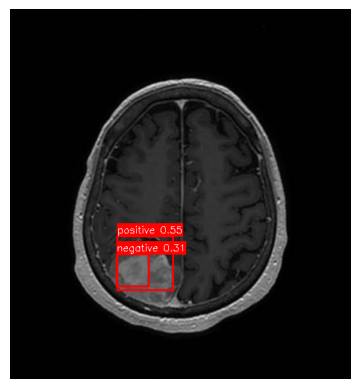

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torch # Import PyTorch to use .cpu()

# Load the image
img = cv2.imread("/content/test image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw predictions on the image
for result in results:
    # Move tensors to CPU before converting to NumPy
    boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes
    classes = result.boxes.cls.cpu().numpy()  # Get class labels
    scores = result.boxes.conf.cpu().numpy()  # Get confidence scores

    for box, cls, score in zip(boxes, classes, scores):
        x1, y1, x2, y2 = map(int, box)
        label = f'{model.names[int(cls)]} {score:.2f}'
        color = (255, 0, 0)  # Red color for bounding box

        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        # Draw label
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        img = cv2.rectangle(img, (x1, y1 - 20), (x1 + w, y1), color, -1)
        img = cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Display the image with matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()